# Sécu & IA
## Lab session 1: Anomaly detection

Victor Simonin (victor.simonin)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

---
### Loading data

In [6]:
train_transaction = pd.read_csv('data/train_transaction.csv')
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
only_fraud = train_transaction[train_transaction['isFraud'] == 1].head(300)
only_fraud

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,2998003,1,330244,54.000,W,3507,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11019,2998019,1,330423,150.000,H,3821,111.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11035,2998035,1,330738,171.000,W,4993,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11043,2998043,1,330852,39.000,W,16727,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
only_legal = train_transaction[train_transaction['isFraud'] == 0].head(9700)
only_legal

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,2996960,0,312176,102.0,W,16255,470.0,150.0,mastercard,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9961,2996961,0,312184,100.0,H,7585,553.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9962,2996962,0,312210,59.0,W,10854,593.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9963,2996963,0,312223,25.0,H,15063,514.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
reduced_transaction_df = pd.concat([only_legal, only_fraud])
reduced_transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,2998003,1,330244,54.0,W,3507,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11019,2998019,1,330423,150.0,H,3821,111.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11035,2998035,1,330738,171.0,W,4993,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11043,2998043,1,330852,39.0,W,16727,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Data set observation

5 - Print the head of the dataset

In [10]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6 - List following information for the training set

6 - 1 - Column number

In [44]:
reduced_transaction_df.columns.size

394

6 - 2 - Column names

In [11]:
for c in reduced_transaction_df.columns:
    print(c)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

6 - 3 - Size of the data set

In [12]:
reduced_transaction_df.size

3940000

6 - 4 - Column types

In [13]:
for t in reduced_transaction_df.dtypes:
    print(t)

int64
int64
int64
float64
object
int64
float64
float64
object
float64
object
float64
float64
float64
float64
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
object
object
object
object
object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float6

7 - Control the correct extraction of transaction: number of non-fraudulent transactions,
number of fraudulent transactions, rate of fraudulent transactions

In [14]:
non_fraud_trans = len(reduced_transaction_df[reduced_transaction_df['isFraud'] == 0])
non_fraud_trans

9700

In [15]:
fraud_trans = len(reduced_transaction_df[reduced_transaction_df['isFraud'] == 1])
fraud_trans

300

In [16]:
fraud_rate = (fraud_trans / (non_fraud_trans + fraud_trans)) * 100
print(fraud_rate, '%')

3.0 %


8 - Which columns are categories? List them; extract existing values.

In [17]:
reduced_transaction_df.select_dtypes(exclude=np.number)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,W,visa,credit,gmail.com,NaN,T,F,F,M0,T,T,F,F,T
11019,H,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11035,W,visa,credit,gmail.com,NaN,T,T,T,M0,T,T,T,T,T
11043,W,visa,credit,gmail.com,NaN,T,T,T,M0,T,F,F,F,T


9 - Which columns are numeric? List them; extract min, max, mean, median and standard deviation values.

In [18]:
numeric_col = reduced_transaction_df.select_dtypes(np.number)
numeric_col

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,2998003,1,330244,54.0,3507,NaN,150.0,226.0,204.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11019,2998019,1,330423,150.0,3821,111.0,150.0,219.0,264.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11035,2998035,1,330738,171.0,4993,553.0,150.0,226.0,123.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11043,2998043,1,330852,39.0,16727,111.0,150.0,226.0,204.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
numeric_col.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,9879.000000,9999.000000,9977.000000,9085.000000,9085.000000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.00000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,2.992002e+06,0.030000,186946.307400,131.697962,9821.72530,349.298006,152.747675,200.339581,292.408035,87.006935,...,0.120863,39.364029,56.883453,46.094245,1.40000,12.184173,4.766906,12.510791,16.933094,13.579137
std,2.890704e+03,0.170596,56659.009503,215.322897,4778.43846,157.706139,10.214671,39.075703,103.693677,0.249739,...,0.504619,246.807743,279.793901,256.895001,10.50899,79.039076,41.790872,85.985530,110.775708,90.175690
min,2.987000e+06,0.000000,86400.000000,1.896000,1011.00000,100.000000,100.000000,100.000000,110.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.989500e+06,0.000000,146628.750000,44.492500,6360.25000,194.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.992000e+06,0.000000,171644.000000,74.970000,9500.00000,327.000000,150.000000,224.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.994499e+06,0.000000,240112.000000,134.950000,13780.00000,500.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.998173e+06,1.000000,333007.000000,3247.910000,18390.00000,600.000000,225.000000,237.000000,536.000000,96.000000,...,6.000000,6300.000000,6300.000000,6300.000000,150.00000,1300.000000,1300.000000,1500.000000,1630.000000,1500.000000


10 -  For each column, print the rate of undefined values (NaN for numeric)

In [20]:
percent_missing = reduced_transaction_df.isna().sum() * 100 / len(reduced_transaction_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
TransactionID,0.0
isFraud,0.0
TransactionDT,0.0
TransactionAmt,0.0
ProductCD,0.0
...,...
V335,86.1
V336,86.1
V337,86.1
V338,86.1


11 - For each numerical column, print the rate of zero (0) value

In [21]:
zero_numeric = pd.DataFrame({'zero rate' : (numeric_col == 0).sum() * 100 / len(numeric_col)})
zero_numeric

,zero rate
TransactionID,0.00
isFraud,97.00
TransactionDT,0.00
TransactionAmt,0.00
card1,0.00
...,...
V335,12.86
V336,13.12
V337,12.85
V338,12.64


---
### Data set visualisation

12 - Visualise the dataset using dimensions: 'TransactionAmt', 'card1','addr1'

In [22]:
def show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    X = transac_dataset.drop(columns=['isFraud'])
    Y = transac_dataset['isFraud']
    
    x = x_axis_name
    y = y_axis_name
    z = z_axis_name

    zOffset = 0.02
    limit = len(X)

    sb.reset_orig()

    fig = plt.figure(figsize = ( 10, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', s = 1, label = 'genuine')
    
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', s = 1, label = 'fraudulent')
    
    ax.set_xlabel(x, size = 16)
    ax.set_ylabel(y + ' [hour]', size = 16)
    ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
    ax.set_title('Error-based features separate out genuine and fraudulent transactions', size = 20)
    
    plt.axis('tight')
    ax.grid(1)
    
    noFraudMarker = mlines.Line2D([], [], linewidth = 0, color = 'g', marker = '.', markersize = 10, label = 'genuine')
    fraudMarker = mlines.Line2D([], [], linewidth = 0, color = 'r', marker = '.', markersize = 10, label = 'fraudulent')
    
    plt.legend(handles = [noFraudMarker, fraudMarker], bbox_to_anchor = (1.20, 0.38), frameon = False, prop = {'size': 16})

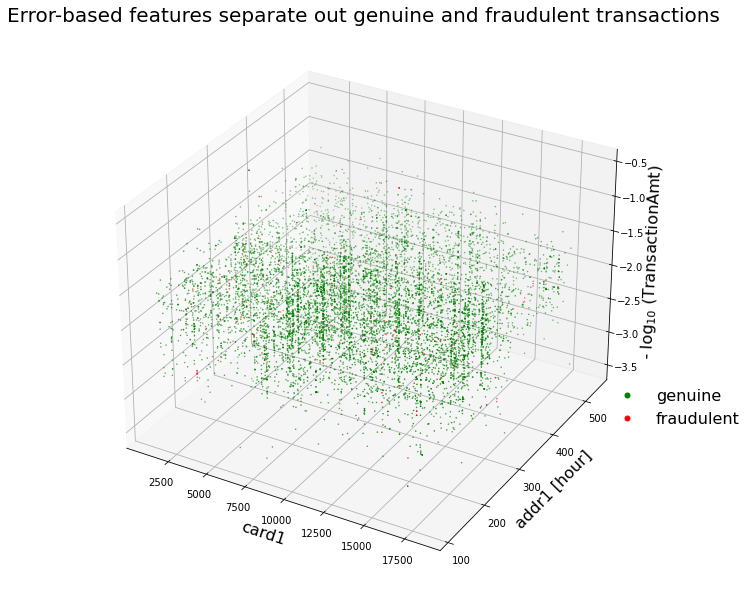

In [23]:
show3D_transation_data(reduced_transaction_df, 'card1', 'addr1', 'TransactionAmt')

13 - Create an alternate visualisation function for visualising fraud entries only, in red

In [24]:
def show3D_transation_data_fraud_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    X = transac_dataset.drop(columns=['isFraud'])
    Y = transac_dataset['isFraud']
    
    x = x_axis_name
    y = y_axis_name
    z = z_axis_name

    zOffset = 0.02
    limit = len(X)

    sb.reset_orig()

    fig = plt.figure(figsize = ( 10, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', s = 1, label = 'fraudulent')
    
    ax.set_xlabel(x, size = 16)
    ax.set_ylabel(y + ' [hour]', size = 16)
    ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
    ax.set_title('Features separate for fraudulent transactions', size = 20)
    
    plt.axis('tight')
    ax.grid(1)
    fraudMarker = mlines.Line2D([], [], linewidth = 0, color = 'r', marker = '.', markersize = 10, label = 'fraudulent')
    
    plt.legend(bbox_to_anchor = (1.20, 0.38), frameon = False, prop = {'size': 16})

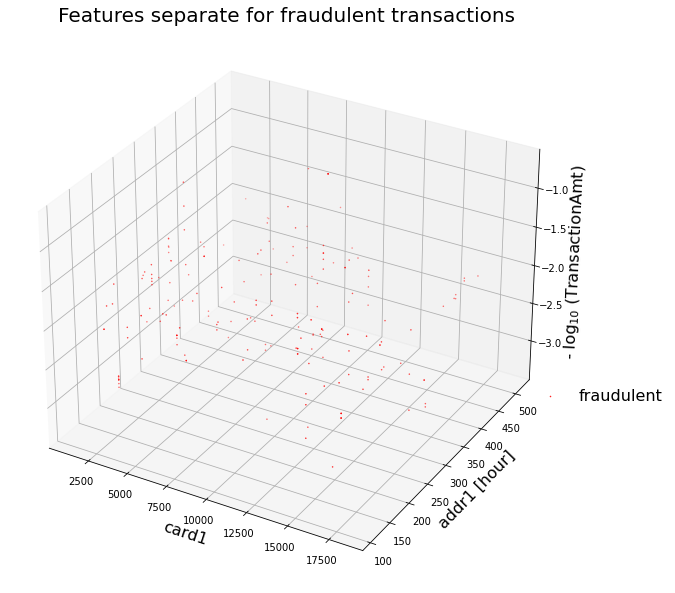

In [25]:
show3D_transation_data_fraud_only(reduced_transaction_df, 'card1', 'addr1', 'TransactionAmt')

---
### Data Cleaning

14 - Perform one-hot encoding of categorical data

In [26]:
one_hot_encoded = pd.get_dummies(reduced_transaction_df.copy())
one_hot_encoded

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,1,0,0,1,0,0,0,0,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0,1,0,1,0,0,0,0,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,1,0,1,0,1,0,1,0,1,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0,1,1,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,2998003,1,330244,54.0,3507,NaN,150.0,226.0,204.0,87.0,...,0,1,0,1,1,0,1,0,0,1
11019,2998019,1,330423,150.0,3821,111.0,150.0,219.0,264.0,87.0,...,0,0,0,0,0,0,0,0,0,0
11035,2998035,1,330738,171.0,4993,553.0,150.0,226.0,123.0,87.0,...,0,1,0,1,0,1,0,1,0,1
11043,2998043,1,330852,39.0,16727,111.0,150.0,226.0,204.0,87.0,...,0,1,1,0,1,0,1,0,0,1


15 - Remove NaN (Not a number) values by imputation of the mean of the column

In [27]:
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
reduced_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(one_hot_encoded))
reduced_with_imputed_values.columns = one_hot_encoded.columns
reduced_with_imputed_values

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000.0,0.0,86400.0,68.5,13926.0,349.298006,150.0,142.0,315.0,87.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001.0,0.0,86401.0,29.0,2755.0,404.000000,150.0,102.0,325.0,87.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002.0,0.0,86469.0,59.0,4663.0,490.000000,150.0,166.0,330.0,87.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2987003.0,0.0,86499.0,50.0,18132.0,567.000000,150.0,117.0,476.0,87.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004.0,0.0,86506.0,50.0,4497.0,514.000000,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003.0,1.0,330244.0,54.0,3507.0,349.298006,150.0,226.0,204.0,87.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9996,2998019.0,1.0,330423.0,150.0,3821.0,111.000000,150.0,219.0,264.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,2998035.0,1.0,330738.0,171.0,4993.0,553.000000,150.0,226.0,123.0,87.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
9998,2998043.0,1.0,330852.0,39.0,16727.0,111.000000,150.0,226.0,204.0,87.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


16 - Control that no NaN value remain in the dataframe

In [28]:
reduced_with_imputed_values.isna().sum().sum()

0

---
### Outlier detection
#### Isolation Forests

17 - Extract outliers using sklearn.ensemble.IsolationForests, using and outliers_fraction = 0.03. Control the numbers of outliers.

In [29]:
isolation_forest = IsolationForest(contamination=0.03)
clf = isolation_forest.fit(reduced_with_imputed_values)

/home/bictole/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [30]:
reduced_with_imputed_values_and_outlier = reduced_with_imputed_values.copy()
reduced_with_imputed_values_and_outlier['if_outlier'] = [i == -1 for i in clf.predict(reduced_with_imputed_values) ]
reduced_with_imputed_values_and_outlier

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outlier
0,2987000.0,0.0,86400.0,68.5,13926.0,349.298006,150.0,142.0,315.0,87.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,2987001.0,0.0,86401.0,29.0,2755.0,404.000000,150.0,102.0,325.0,87.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2987002.0,0.0,86469.0,59.0,4663.0,490.000000,150.0,166.0,330.0,87.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,False
3,2987003.0,0.0,86499.0,50.0,18132.0,567.000000,150.0,117.0,476.0,87.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,2987004.0,0.0,86506.0,50.0,4497.0,514.000000,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003.0,1.0,330244.0,54.0,3507.0,349.298006,150.0,226.0,204.0,87.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,False
9996,2998019.0,1.0,330423.0,150.0,3821.0,111.000000,150.0,219.0,264.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
9997,2998035.0,1.0,330738.0,171.0,4993.0,553.000000,150.0,226.0,123.0,87.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,False
9998,2998043.0,1.0,330852.0,39.0,16727.0,111.000000,150.0,226.0,204.0,87.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False


In [152]:
reduced_with_imputed_values_and_outlier.groupby(by=['if_outlier', 'isFraud']).count()

TransactionID  TransactionDT  TransactionAmt  card1  \
if_outlier isFraud                                                        
False      0.0               9442           9442            9442   9442   
           1.0                258            258             258    258   
True       0.0                258            258             258    258   
           1.0                 42             42              42     42   

                    card2  card3  card5  addr1  addr2  dist1  ...  M5_F  M5_T  \
if_outlier isFraud                                            ...               
False      0.0       9442   9442   9442   9442   9442   9442  ...  9442  9442   
           1.0        258    258    258    258    258    258  ...   258   258   
True       0.0        258    258    258    258    258    258  ...   258   258   
           1.0         42     42     42     42     42     42  ...    42    42   

                    M6_F  M6_T  M7_F  M7_T  M8_F  M8_T  M9_F  M9_T  
if_outlier isFraud                                                  
False      0.0      9442  9442  9442  9442  9442  9442  9442  9442  
           1.0       258   258   258   258   258   258   258   258  
True       0.0       258   258   258   258   258   258   258   258  
           1.0        42    42    42    42    42    42    42    42  

[4 rows x 495 columns]

We observe that the probability to be a Fraud is quite more important when we are an Outlier, but it is not an perfect rule.

In [31]:
reduced_with_imputed_values_and_outlier[(reduced_with_imputed_values_and_outlier.isFraud==1) & (reduced_with_imputed_values_and_outlier.if_outlier==True)]

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outlier
9702,2987243.0,1.0,90246.0,37.098,13413.0,103.0,185.0,137.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9703,2987245.0,1.0,90295.0,37.098,13413.0,103.0,185.0,137.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9704,2987288.0,1.0,90986.0,155.521,16578.0,545.0,185.0,226.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9705,2987367.0,1.0,92350.0,225.000,4425.0,562.0,150.0,197.000000,472.000000,87.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9706,2987405.0,1.0,92999.0,90.570,4504.0,500.0,185.0,219.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9707,2987630.0,1.0,97843.0,12.326,5812.0,408.0,185.0,224.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9708,2987683.0,1.0,99584.0,124.344,5812.0,408.0,185.0,224.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9711,2987780.0,1.0,102188.0,10.000,8732.0,360.0,150.0,229.000000,441.000000,87.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9712,2987781.0,1.0,102193.0,10.000,8732.0,360.0,150.0,229.000000,441.000000,87.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9713,2987869.0,1.0,106603.0,83.380,9026.0,545.0,185.0,137.000000,292.408035,87.006935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


18 - Create yet another visualisation function for visualising IsolationForest outliers entries only, in red

In [32]:
def show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    X = transac_dataset.drop(columns=['if_outlier'])
    Y = transac_dataset['if_outlier']
    
    x = x_axis_name
    y = y_axis_name
    z = z_axis_name

    zOffset = 0.02
    limit = len(X)

    sb.reset_orig()

    fig = plt.figure(figsize = ( 10, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', s = 1, label = 'fraudulent')
    
    ax.set_xlabel(x, size = 16)
    ax.set_ylabel(y + ' [hour]', size = 16)
    ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
    ax.set_title('Features separate for fraudulent transactions', size = 20)
    
    plt.axis('tight')
    ax.grid(1)
    fraudMarker = mlines.Line2D([], [], linewidth = 0, color = 'r', marker = '.', markersize = 10, label = 'is_outlier')
    
    plt.legend(bbox_to_anchor = (1.20, 0.38), frameon = False, prop = {'size': 16})

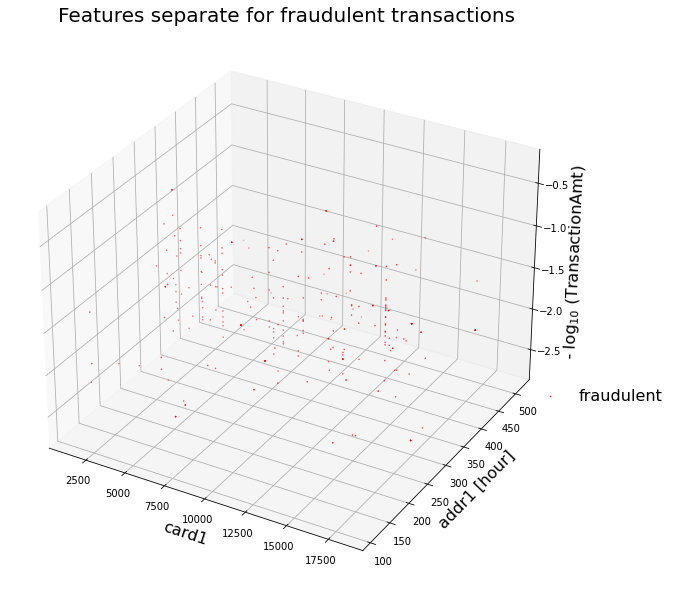

In [33]:
show3D_transation_data_if_outliers_only(reduced_with_imputed_values_and_outlier, 'card1', 'addr1', 'TransactionAmt')

---
#### Local Outlier Factor (LOF)

19 - Extract outliers using sklearn.neighbors. LocalOutlierFactor, using and outliers_fraction = 0.03. Control the numbers of outliers.

In [34]:
clf2 = LocalOutlierFactor(contamination=0.03)

In [35]:
reduced_with_imputed_values_and_outlier['lof_outlier'] = [i == -1 for i in clf2.fit_predict(reduced_with_imputed_values) ]
reduced_with_imputed_values_and_outlier

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outlier,lof_outlier
0,2987000.0,0.0,86400.0,68.5,13926.0,349.298006,150.0,142.0,315.0,87.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,2987001.0,0.0,86401.0,29.0,2755.0,404.000000,150.0,102.0,325.0,87.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2987002.0,0.0,86469.0,59.0,4663.0,490.000000,150.0,166.0,330.0,87.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,False,False
3,2987003.0,0.0,86499.0,50.0,18132.0,567.000000,150.0,117.0,476.0,87.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
4,2987004.0,0.0,86506.0,50.0,4497.0,514.000000,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003.0,1.0,330244.0,54.0,3507.0,349.298006,150.0,226.0,204.0,87.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,False,False
9996,2998019.0,1.0,330423.0,150.0,3821.0,111.000000,150.0,219.0,264.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
9997,2998035.0,1.0,330738.0,171.0,4993.0,553.000000,150.0,226.0,123.0,87.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,False,False
9998,2998043.0,1.0,330852.0,39.0,16727.0,111.000000,150.0,226.0,204.0,87.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False,False


In [36]:
reduced_with_imputed_values_and_outlier.groupby(by=['lof_outlier', 'isFraud']).count()

TransactionID  TransactionDT  TransactionAmt  card1  \
lof_outlier isFraud                                                        
False       0.0               9417           9417            9417   9417   
            1.0                283            283             283    283   
True        0.0                283            283             283    283   
            1.0                 17             17              17     17   

                     card2  card3  card5  addr1  addr2  dist1  ...  M5_T  \
lof_outlier isFraud                                            ...         
False       0.0       9417   9417   9417   9417   9417   9417  ...  9417   
            1.0        283    283    283    283    283    283  ...   283   
True        0.0        283    283    283    283    283    283  ...   283   
            1.0         17     17     17     17     17     17  ...    17   

                     M6_F  M6_T  M7_F  M7_T  M8_F  M8_T  M9_F  M9_T  \
lof_outlier isFraud                                                   
False       0.0      9417  9417  9417  9417  9417  9417  9417  9417   
            1.0       283   283   283   283   283   283   283   283   
True        0.0       283   283   283   283   283   283   283   283   
            1.0        17    17    17    17    17    17    17    17   

                     if_outlier  
lof_outlier isFraud              
False       0.0            9417  
            1.0             283  
True        0.0             283  
            1.0              17  

[4 rows x 496 columns]

Here we have 17 outliers labelled as fraudulent transactions.

20 - Create yet another visualisation function for visualising LOF outliers entries only, in red

In [37]:
def show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    X = transac_dataset.drop(columns=['lof_outlier'])
    Y = transac_dataset['lof_outlier']
    
    x = x_axis_name
    y = y_axis_name
    z = z_axis_name

    zOffset = 0.02
    limit = len(X)

    sb.reset_orig()

    fig = plt.figure(figsize = ( 10, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', s = 1, label = 'lof')
    
    ax.set_xlabel(x, size = 16)
    ax.set_ylabel(y + ' [hour]', size = 16)
    ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
    ax.set_title('Features separate for lof transactions', size = 20)
    
    plt.axis('tight')
    ax.grid(1)
    
    fraudMarker = mlines.Line2D([], [], linewidth = 0, color = 'r', marker = '.', markersize = 10, label = 'lof_outlier')
    
    plt.legend(bbox_to_anchor = (1.20, 0.38), frameon = False, prop = {'size': 16})

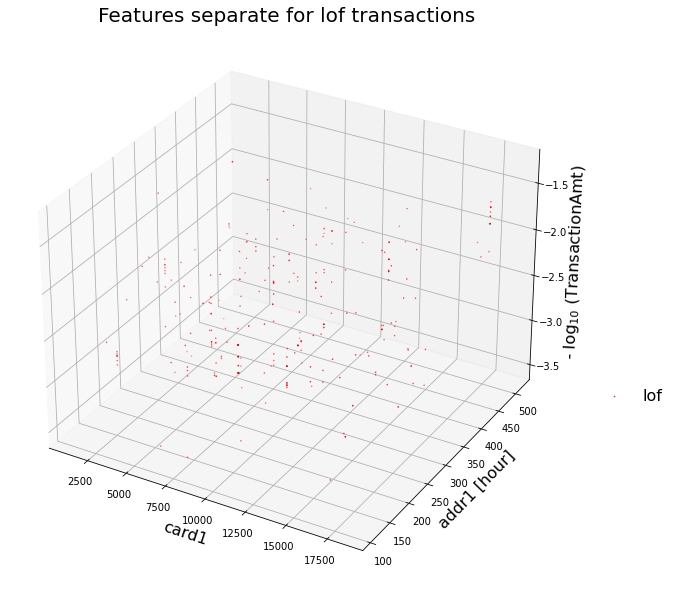

In [39]:
show3D_transation_data_lof_outliers_only(reduced_with_imputed_values_and_outlier, 'card1', 'addr1', 'TransactionAmt')

---
#### Comparison of IsolationForest and LOF

21 - Control the complementarity between the 2 algorithms

21 - 1 - How many outliers are common to IsolationForest and LOF?

In [40]:
len(reduced_with_imputed_values_and_outlier[reduced_with_imputed_values_and_outlier['lof_outlier'] & reduced_with_imputed_values_and_outlier['if_outlier']])

16

21 - 2 - How many fraudulent outliers are common to IsolationForest and LOF?

In [41]:
len(reduced_with_imputed_values_and_outlier[reduced_with_imputed_values_and_outlier['lof_outlier'] & reduced_with_imputed_values_and_outlier['if_outlier'] & reduced_with_imputed_values_and_outlier['isFraud']]) 

2

21 - 3 - What do you deduce for building unsupervised outlier detectors?

The results are not great, and we can deduce multiple reason. The main one would be that we don't have enough data for this kind of algorithms. The unsupervised algorithm are not stable to perform well between each other.
But we still find a correlation between fraud and outliers, so there is something to get from this implementation. 